In [2]:
from PIL import Image, ImageChops, ImageEnhance
import os
from matplotlib import image
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pathlib
from keras import preprocessing
from keras import callbacks
from keras import backend as K
from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

img_width, img_height = 600, 600
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Using TensorFlow backend.


In [3]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 600
IMG_WIDTH = 600
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)


BATCH_SIZE=32
NUM_EPOCHS=20

data_dir='./real_and_fake_face/converted'
train_dir='./real_and_fake_face/converted/train'
valid_dir='./real_and_fake_face/converted/validation'
training_fake_loc = './real_and_fake_face/training_fake/'
converted_train_fake_loc = './real_and_fake_face/converted90x4/train/fake/'
training_real_loc = './real_and_fake_face/training_real/'
converted_train_real_loc= './real_and_fake_face/converted90x4/train/real/'
test_loc='./real_and_fake_face/converted/test'

converted_train_loc = './real_and_fake_face/converted/train/'
converted_test_loc = './real_and_fake_face/converted/validation/'

converted_train_loc_80 = './real_and_fake_face/converted80/train/'
converted_test_loc_80 = './real_and_fake_face/converted80/test/'

converted_train_loc_80_backup = './real_and_fake_face/converted80/backup/train/'
converted_test_loc_80_backup = './real_and_fake_face/converted80/backup/test/'

converted_train_loc_70 = './real_and_fake_face/converted70x2/train/'
converted_test_loc_70 = './real_and_fake_face/converted70x2/test/'

converted_train_loc_70_backup = './real_and_fake_face/converted70/backup/train/'
converted_test_loc_70_backup = './real_and_fake_face/converted70/backup/test/'

converted_train_loc_90 = './real_and_fake_face/converted90/train/'
converted_test_loc_90 = './real_and_fake_face/converted90/test/'
converted_validate_loc_90 = './real_and_fake_face/converted90/validate/'

In [4]:
data_dir = pathlib.Path(data_dir)
converted_train_loc_80_dir=pathlib.Path(converted_train_loc_80)
converted_test_loc_80_dir=pathlib.Path(converted_test_loc_80)

In [5]:
CLASS_NAMES = np.array([item.name for item in converted_train_loc_80_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['fake', 'real'], dtype='<U4')

In [10]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [33]:
for f in list_ds.take(5):
  print(f.numpy())

b'real_and_fake_face\\converted\\training_fake_converted\\mid_366_1111_ela_flip.jpg'
b'real_and_fake_face\\converted\\training_real_converted\\real_01024_ela_180.jpg'
b'real_and_fake_face\\converted\\training_real_converted\\real_00007_ela_180.jpg'
b'real_and_fake_face\\converted\\training_fake_converted\\hard_148_1010_ela_270.jpg'
b'real_and_fake_face\\converted\\training_fake_converted\\mid_102_1100_ela_90.jpg'


In [34]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')


In [75]:
train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 0 images belonging to 2 classes.


In [125]:
nb_train_samples=1633
nb_test_samples=408

In [77]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [86]:
train_generator = train_datagen.flow_from_directory(
        directory=converted_train_loc_60x2,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        directory=converted_test_loc_60x2,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=32,
        class_mode='binary')

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [94]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=nb_test_samples // BATCH_SIZE)

Epoch 1/20
51/51 [==============================] - 173s 3s/step - loss: 0.6985 - accuracy: 0.5091 - val_loss: 0.6930 - val_accuracy: 0.4844
Epoch 2/20
51/51 [==============================] - 70s 1s/step - loss: 0.6915 - accuracy: 0.5284 - val_loss: 0.6927 - val_accuracy: 0.5266
Epoch 3/20
51/51 [==============================] - 46s 892ms/step - loss: 0.6951 - accuracy: 0.5322 - val_loss: 0.6929 - val_accuracy: 0.5213
Epoch 4/20
51/51 [==============================] - 55s 1s/step - loss: 0.6929 - accuracy: 0.5263 - val_loss: 0.6944 - val_accuracy: 0.5160
Epoch 5/20
51/51 [==============================] - 47s 922ms/step - loss: 0.6927 - accuracy: 0.5293 - val_loss: 0.6939 - val_accuracy: 0.5426
Epoch 6/20
51/51 [==============================] - 50s 987ms/step - loss: 0.6928 - accuracy: 0.5259 - val_loss: 0.6907 - val_accuracy: 0.5266
Epoch 7/20
51/51 [==============================] - 43s 850ms/step - loss: 0.6919 - accuracy: 0.5315 - val_loss: 0.6907 - val_accuracy: 0.5346
Epoch 8

In [98]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 25, 25, 256)       147712    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 12, 12, 512)     

In [40]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [42]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(1633/BATCH_SIZE)

In [44]:
train_data_gen = image_generator.flow_from_directory(directory=str(converted_train_loc_90),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 1633 images belonging to 2 classes.


In [45]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

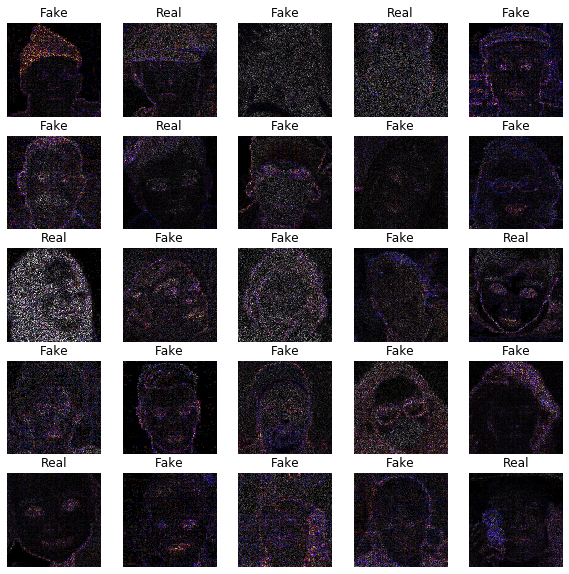

In [46]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [23]:
def loadImages(directories):
    loaded_images = list()
    labels = list()
    label=0
    for folder in os.listdir(directories):
        for filename in os.listdir("C:/Users/oneey/Desktop/Matt Stuff/real_and_fake_face/converted/"+folder):
            img_data = image.imread("C:/Users/oneey/Desktop/Matt Stuff/real_and_fake_face/converted/"+folder+ "/" + filename)
            loaded_images.append(img_data)
            labels.append(label)
            print('> loaded %s %s' % (filename, img_data.shape))
        label=label+1
# for filename in os.listdir('./real_and_fake_face/training_real/'):
#     # load image
#     img_data = image.imread('./real_and_fake_face/training_real/' + filename)
#     # store loaded image
#     loaded_images.append(img_data)
#     y_train.append(0)
#     print('> loaded %s %s' % (filename, img_data.shape))
#     print("Loading complete")
    return np.array(loaded_images), np.array(labels)

In [ ]:
loadImages(data_dir)

In [6]:
def convertToELA(origin, destination, enhancement, q, suffix):
    for image in os.listdir(origin):
        imageR = Image.open(origin+image)
        tempName=image[:-4]+'_temp.jpg'
        imageR.save(origin+tempName, 'JPEG', quality=q)
        temp = Image.open(origin+tempName)
        ela=ImageChops.difference(imageR,temp)
        extrema = ela.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        scale = 255.0/max_diff
        ela_im = ImageEnhance.Brightness(ela).enhance(scale*enhancement)
        ela_im.save(origin+image[:-4]+suffix, 'JPEG')
        shutil.move(origin+image[:-4]+suffix, destination+image[:-4]+suffix)
        os.remove(origin+tempName)

In [9]:
convertToELA(training_real_loc,converted_train_real_loc, 4, 90, '_ela90.jpg')

In [79]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=3, activation='relu', padding='same', input_shape=(600,600,3,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
# model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 25, 25, 256)       147712    
_________________________________________________________________
flatten_11 (Flatten)         (None, 160000)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)              

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'newX_train' is not defined

In [108]:
def dataAugmentation():
    os.chdir(os.path.abspath(r'/Users/oneey/Desktop/Matt Stuff/real_and_fake_face/converted80/test/fake'))
    for file in os.listdir(r'/Users/oneey/Desktop/Matt Stuff/real_and_fake_face/converted80/test/fake'):
        fileName=file[:-4]
        im=Image.open(file)
        im_90=im.rotate(90)
        im_90.save(fileName+"_90.jpg", format='JPEG')
        im_180=im.rotate(180)
        im_180.save(fileName+"_180.jpg", format='JPEG')
        im_270=im.rotate(270)
        im_270.save(fileName+"_270.jpg", format='JPEG')
        imr=im.transpose(Image.FLIP_LEFT_RIGHT)
        imr.save(fileName+"_flip.jpg", format='JPEG')
        imr=Image.open(fileName+"_flip.jpg")
        imr_90=imr.rotate(90)
        imr_90.save(fileName+"_flip90.jpg", format='JPEG')
        imr_180=imr.rotate(180)
        imr_180.save(fileName+"_flip180.jpg", format='JPEG')
        imr_270=imr.rotate(270)
        imr_270.save(fileName+"_flip270.jpg", format='JPEG')

In [109]:
dataAugmentation()

In [118]:
os.chdir(os.path.abspath(r'/Users/oneey/Desktop/Matt Stuff'))

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(600,600),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(600, 600),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        verbose=1,
        epochs=5)

In [8]:




# dimensions of our images.
img_width, img_height = 600, 600

train_data_dir = 'real_and_fake_face/converted/train'
validation_data_dir = 'real_and_fake_face/converted/validation'
nb_train_samples = 13032
nb_validation_samples = 3296
# nb_train_samples=1633
# nb_test_samples=408
epochs = 100
batch_size = 32
# batch_size=16



In [18]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(11,11), strides=2, padding='same', input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (5, 5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 300, 300, 16)      5824      
_________________________________________________________________
activation_22 (Activation)   (None, 300, 300, 16)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 150, 32)      12832     
_________________________________________________________________
activation_23 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)       

In [206]:
# model.load_weights('second_try.h5')
model.load_weights('80_aug_set.h5')
train_datagen = ImageDataGenerator(rescale=1. / 255)
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
    directory=converted_train_loc,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
    directory=converted_test_loc,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

model.save_weights('90_big_set.h5')
#80_aug_set.h5

Found 13032 images belonging to 2 classes.
Found 3296 images belonging to 2 classes.
Epoch 1/20
62/62 [==============================] - 178s 3s/step - loss: 0.6956 - accuracy: 0.5015 - val_loss: 0.6920 - val_accuracy: 0.4948
Epoch 2/20
62/62 [==============================] - 76s 1s/step - loss: 0.7153 - accuracy: 0.5332 - val_loss: 0.6941 - val_accuracy: 0.5391
Epoch 3/20
62/62 [==============================] - 84s 1s/step - loss: 0.7106 - accuracy: 0.5806 - val_loss: 0.7221 - val_accuracy: 0.5312
Epoch 4/20
62/62 [==============================] - 86s 1s/step - loss: 0.6868 - accuracy: 0.5615 - val_loss: 0.6738 - val_accuracy: 0.5130
Epoch 5/20
62/62 [==============================] - 89s 1s/step - loss: 0.6795 - accuracy: 0.5711 - val_loss: 0.7319 - val_accuracy: 0.5339
Epoch 6/20
62/62 [==============================] - 81s 1s/step - loss: 0.6874 - accuracy: 0.5741 - val_loss: 0.7273 - val_accuracy: 0.5130
Epoch 7/20
62/62 [==============================] - 83s 1s/step - loss: 0.

In [ ]:
# model.load_weights('second_try.h5')
model.load_weights('80_aug_set.h5')

model.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

model.save_weights('90_big_set.h5')
#80_aug_set.h5

In [ ]:
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
# nb_test_samples=408
train_datagen = ImageDataGenerator(rescale=1. / 255)
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
    directory=converted_train_loc_70,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
    directory=converted_test_loc_70,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# model.load_weights('90_big_set150.h5')
model.load_weights('80_small_set150.h5')
model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)
model.save_weights('70_small_set150.h5')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Epoch 1/30


In [211]:
model.load_weights('90_big_set.h5')
model.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)
model.save_weights('90_big_set150.h5')

Epoch 1/50
250/250 [==============================] - 265s 1s/step - loss: 0.5841 - accuracy: 0.7584 - val_loss: 0.6194 - val_accuracy: 0.6062
Epoch 2/50
250/250 [==============================] - 231s 925ms/step - loss: 0.6183 - accuracy: 0.7415 - val_loss: 0.6515 - val_accuracy: 0.6162
Epoch 3/50
250/250 [==============================] - 165s 659ms/step - loss: 0.5264 - accuracy: 0.7560 - val_loss: 0.8881 - val_accuracy: 0.5638
Epoch 4/50
250/250 [==============================] - 172s 688ms/step - loss: 0.6485 - accuracy: 0.7454 - val_loss: 1.0987 - val_accuracy: 0.6087
Epoch 5/50
250/250 [==============================] - 173s 693ms/step - loss: 0.9474 - accuracy: 0.7648 - val_loss: 0.7872 - val_accuracy: 0.6125
Epoch 6/50
250/250 [==============================] - 191s 764ms/step - loss: 0.5379 - accuracy: 0.7677 - val_loss: 0.5921 - val_accuracy: 0.6087
Epoch 7/50
250/250 [==============================] - 182s 730ms/step - loss: 0.5559 - accuracy: 0.7599 - val_loss: 0.8112 - va

In [215]:
model.load_weights('90_big_set150.h5')
model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)
model.save_weights('80_small_set150.h5')

Epoch 1/50
62/62 [==============================] - 38s 616ms/step - loss: 1.1683 - accuracy: 0.6068 - val_loss: 0.5761 - val_accuracy: 0.6042
Epoch 2/50
62/62 [==============================] - 41s 654ms/step - loss: 0.6679 - accuracy: 0.6170 - val_loss: 0.6063 - val_accuracy: 0.6875
Epoch 3/50
62/62 [==============================] - 35s 568ms/step - loss: 0.7238 - accuracy: 0.6093 - val_loss: 0.5573 - val_accuracy: 0.6196
Epoch 4/50
62/62 [==============================] - 36s 578ms/step - loss: 0.6445 - accuracy: 0.6498 - val_loss: 0.5971 - val_accuracy: 0.6875
Epoch 5/50
62/62 [==============================] - 38s 619ms/step - loss: 0.6707 - accuracy: 0.6144 - val_loss: 0.5661 - val_accuracy: 0.6304
Epoch 6/50
62/62 [==============================] - 39s 630ms/step - loss: 0.6365 - accuracy: 0.6272 - val_loss: 0.5710 - val_accuracy: 0.6406
Epoch 7/50
62/62 [==============================] - 49s 783ms/step - loss: 0.8141 - accuracy: 0.6400 - val_loss: 0.6875 - val_accuracy: 0.6141

In [218]:
model.load_weights('90_big_set150.h5')
model.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)
model.save_weights('80_big_set200.h5')

Epoch 1/50
250/250 [==============================] - 298s 1s/step - loss: 1.2193 - accuracy: 0.7060 - val_loss: 1.7289 - val_accuracy: 0.6087
Epoch 2/50
250/250 [==============================] - 237s 946ms/step - loss: 0.6404 - accuracy: 0.7061 - val_loss: 1.1113 - val_accuracy: 0.5938
Epoch 3/50
250/250 [==============================] - 297s 1s/step - loss: 0.5688 - accuracy: 0.7042 - val_loss: 1.3848 - val_accuracy: 0.5825
Epoch 4/50
250/250 [==============================] - 214s 855ms/step - loss: 0.6172 - accuracy: 0.6917 - val_loss: 0.7023 - val_accuracy: 0.5800
Epoch 5/50
250/250 [==============================] - 218s 871ms/step - loss: 0.6102 - accuracy: 0.6881 - val_loss: 0.6828 - val_accuracy: 0.5362
Epoch 6/50
250/250 [==============================] - 247s 990ms/step - loss: 0.7653 - accuracy: 0.6866 - val_loss: 0.7429 - val_accuracy: 0.5638
Epoch 7/50
250/250 [==============================] - 280s 1s/step - loss: 0.6011 - accuracy: 0.6852 - val_loss: 0.6083 - val_accu

In [11]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(11,11), strides=2, padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4),strides=2))

model.add(Conv2D(32, (5, 5), strides=2, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# model.load_weights('90_big_set150.h5')

epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model.save_weights('longrun.h5')    

In [48]:
from keras.models import load_model

model.save('project_model.h5')

In [49]:
model_json_string = model.to_json()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=batch_size,
    class_mode='binary')

eval = model.evaluate_generator(validation_generator, 408/batch_size)

print(eval)
print('Confusion Matrix')


conf_matrix=confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)
print('Classification Report')
target_names = ['fake', 'real']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 408 images belonging to 2 classes.
[0.5962696671485901, 0.7058823704719543]
Confusion Matrix
[[107  85]
 [ 35 181]]
Classification Report
              precision    recall  f1-score   support

        fake       0.75      0.56      0.64       192
        real       0.68      0.84      0.75       216

    accuracy                           0.71       408
   macro avg       0.72      0.70      0.70       408
weighted avg       0.71      0.71      0.70       408



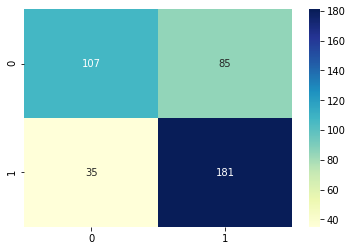

In [22]:
import seaborn as sn
import pandas as pd
conf_mat_DF=pd.DataFrame(conf_matrix, range(2), range(2))
sn.heatmap(conf_mat_DF, annot=True, fmt="d", cmap="YlGnBu")

In [44]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, validation_generator.classes, y_pred,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues)

NameError: name 'classifier' is not defined

In [9]:
validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=1,
    class_mode='binary')
Y_pred = model.predict_generator(validation_generator, 408)

Found 408 images belonging to 2 classes.


In [ ]:
len(Y_pred)

In [63]:
predictions
for item in Y_pred:
    

[[7.04426944e-01]
 [4.37480897e-01]
 [1.15318934e-03]
 [7.54779160e-01]
 [3.31296086e-01]
 [3.37663628e-02]
 [6.20182455e-01]
 [6.79651797e-02]
 [3.68623465e-01]
 [6.13823056e-01]
 [1.02699641e-02]
 [6.12886667e-01]
 [5.15492916e-01]
 [5.37842870e-01]
 [2.70799816e-01]
 [3.29592615e-01]
 [4.79714930e-01]
 [3.85374695e-01]
 [5.90099037e-01]
 [6.60701632e-01]
 [1.94946066e-01]
 [3.26873243e-01]
 [2.77346075e-01]
 [1.68662548e-01]
 [7.97190249e-01]
 [4.64171529e-01]
 [4.27171737e-01]
 [5.40017903e-01]
 [2.42691636e-01]
 [2.23058134e-01]
 [6.28968120e-01]
 [5.84165156e-01]
 [7.01625273e-02]
 [4.65805948e-01]
 [3.47515523e-01]
 [8.18009973e-01]
 [4.92178410e-01]
 [2.27455944e-01]
 [5.69228649e-01]
 [1.48237750e-01]
 [4.37152237e-01]
 [5.67034125e-01]
 [6.14892662e-01]
 [5.71886599e-01]
 [6.98808253e-01]
 [4.89510149e-01]
 [5.61860681e-01]
 [4.91304517e-01]
 [4.40744638e-01]
 [5.46166122e-01]
 [2.98646957e-01]
 [4.83209968e-01]
 [5.52999377e-01]
 [2.97980607e-01]
 [5.10506034e-01]
 [5.718042

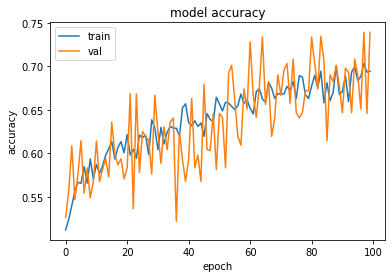

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

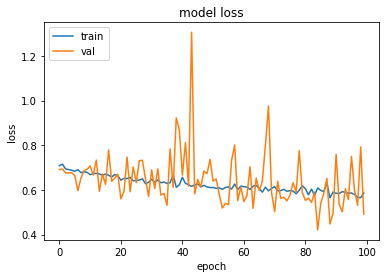

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model = load_model('project_model.h5')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 300, 300, 16)      5824      
_________________________________________________________________
activation_73 (Activation)   (None, 300, 300, 16)      0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 75, 75, 32)        12832     
_________________________________________________________________
activation_74 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 37, 37, 64)      

In [16]:
validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=32,
    class_mode=None)
Y_pred = model.predict_generator(validation_generator, 408/32)
y_true = np.array([0] * 192 + [1] * 216)
y_pred = Y_pred > 0.5
# probabilities = model.predict_generator(generator, 2000)

Found 408 images belonging to 2 classes.


In [17]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true, y_pred)
# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[107  85]
 [ 35 181]]


In [269]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(11,11), strides=3, padding='same', input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(4, 4),strides=2))

model2.add(Conv2D(32, (5, 5), strides=2, padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 300, 300, 16)      5824      
_________________________________________________________________
activation_22 (Activation)   (None, 300, 300, 16)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 150, 32)      12832     
_________________________________________________________________
activation_23 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)       

In [245]:
# model.load_weights('90_big_set.h5')
model2.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)
model2.save_weights('less_pool_90_big_set20.h5')

Epoch 1/30


ResourceExhaustedError:  OOM when allocating tensor with shape[32,16,300,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradients_25/max_pooling2d_174/MaxPool_grad/MaxPoolGrad (defined at C:\Users\oneey\Anaconda3\envs\tensorflow-sessions36\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_1340757]

Function call stack:
keras_scratch_graph


In [271]:
# model2.load_weights('less_pool_90_big_set20.h5')
model2.fit_generator(
    train_generator,
    steps_per_epoch=8000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)
model2.save_weights('giant_back_90_big_set30.h5')

Epoch 1/30
500/500 [==============================] - 538s 1s/step - loss: 0.6833 - accuracy: 0.5695 - val_loss: 0.7114 - val_accuracy: 0.5075
Epoch 2/30
500/500 [==============================] - 300s 600ms/step - loss: 0.6962 - accuracy: 0.5977 - val_loss: 0.6856 - val_accuracy: 0.5356
Epoch 3/30
500/500 [==============================] - 303s 606ms/step - loss: 0.6509 - accuracy: 0.6136 - val_loss: 0.7550 - val_accuracy: 0.5188
Epoch 4/30
500/500 [==============================] - 293s 587ms/step - loss: 0.6366 - accuracy: 0.6291 - val_loss: 0.7292 - val_accuracy: 0.5537
Epoch 5/30
500/500 [==============================] - 289s 578ms/step - loss: 0.6162 - accuracy: 0.6492 - val_loss: 0.7246 - val_accuracy: 0.5475
Epoch 6/30
500/500 [==============================] - 350s 700ms/step - loss: 0.6016 - accuracy: 0.6632 - val_loss: 0.7219 - val_accuracy: 0.5950
Epoch 7/30
500/500 [==============================] - 309s 617ms/step - loss: 0.5807 - accuracy: 0.6826 - val_loss: 0.6765 - va

In [20]:
epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model2.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model2.save_weights('model2longrun.h5')   

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
 2/62 [..............................] - ETA: 1:04:09 - loss: 1.5331 - accuracy: 0.4688

C:\Users\oneey\Anaconda3\envs\tensorflow-sessions36\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.134363). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


62/62 [==============================] - 351s 6s/step - loss: 0.7232 - accuracy: 0.5125 - val_loss: 0.6907 - val_accuracy: 0.5729
Epoch 2/100
62/62 [==============================] - 236s 4s/step - loss: 0.6936 - accuracy: 0.5202 - val_loss: 0.7033 - val_accuracy: 0.4948
Epoch 3/100
62/62 [==============================] - 264s 4s/step - loss: 0.7033 - accuracy: 0.5320 - val_loss: 0.6812 - val_accuracy: 0.5652
Epoch 4/100
62/62 [==============================] - 285s 5s/step - loss: 0.6989 - accuracy: 0.5090 - val_loss: 0.6940 - val_accuracy: 0.5156
Epoch 5/100
62/62 [==============================] - 326s 5s/step - loss: 0.6935 - accuracy: 0.5330 - val_loss: 0.6730 - val_accuracy: 0.6087
Epoch 6/100
62/62 [==============================] - 331s 5s/step - loss: 0.6903 - accuracy: 0.5286 - val_loss: 0.7256 - val_accuracy: 0.4583
Epoch 7/100
62/62 [==============================] - 348s 6s/step - loss: 0.6978 - accuracy: 0.5428 - val_loss: 0.6857 - val_accuracy: 0.5326
Epoch 8/100
62/62 

In [22]:
from keras.models import load_model

model2.save('project_model_2.h5')

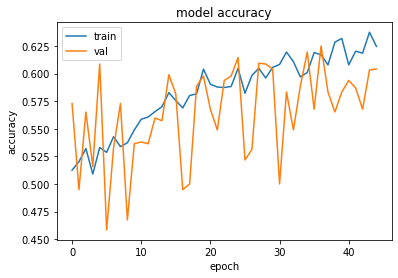

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

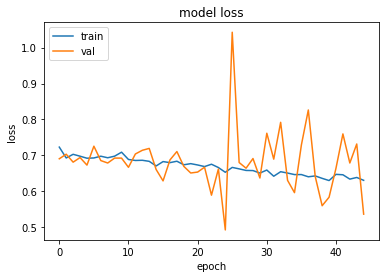

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
#     directory=converted_test_loc_90,
#     target_size=(img_width, img_height),
#     shuffle=False,
#     batch_size=32,
#     class_mode=None)



test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=batch_size,
    class_mode='binary')

Y_pred = model2.predict_generator(validation_generator, 408/32)
y_true = np.array([0] * 192 + [1] * 216)
y_pred = Y_pred > 0.5

eval = model2.evaluate_generator(validation_generator, 408/batch_size)

print(eval)
print('Confusion Matrix')


conf_matrix=confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)
print('Classification Report')
target_names = ['fake', 'real']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 408 images belonging to 2 classes.
[0.49277839064598083, 0.595588207244873]
Confusion Matrix
[[ 35 157]
 [  8 208]]
Classification Report
              precision    recall  f1-score   support

        fake       0.81      0.18      0.30       192
        real       0.57      0.96      0.72       216

    accuracy                           0.60       408
   macro avg       0.69      0.57      0.51       408
weighted avg       0.68      0.60      0.52       408



In [28]:
model2=load_model('project_model_2.h5')

In [30]:
epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model.save_weights('longrun2.h5')
model.save('project_model_run2.h5')

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 337s 5s/step - loss: 0.5908 - accuracy: 0.6718 - val_loss: 0.6288 - val_accuracy: 0.6719
Epoch 2/100
62/62 [==============================] - 274s 4s/step - loss: 0.5826 - accuracy: 0.6994 - val_loss: 0.7468 - val_accuracy: 0.6146
Epoch 3/100
62/62 [==============================] - 276s 4s/step - loss: 0.5822 - accuracy: 0.6988 - val_loss: 0.8038 - val_accuracy: 0.6793
Epoch 4/100
62/62 [==============================] - 263s 4s/step - loss: 0.5877 - accuracy: 0.6902 - val_loss: 0.4337 - val_accuracy: 0.6719
Epoch 5/100
62/62 [==============================] - 311s 5s/step - loss: 0.5887 - accuracy: 0.6646 - val_loss: 0.5950 - val_accuracy: 0.6739
Epoch 6/100
62/62 [==============================] - 274s 4s/step - loss: 0.5766 - accuracy: 0.6989 - val_loss: 0.6105 - val_accuracy: 0.7083
Epoch 7/100
62/62 [==============================] - 281s 5s/step

In [31]:
epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_70,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_70,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model.save_weights('longrun2_with70.h5')
model.save('project_model_run2_with70.h5')

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 316s 5s/step - loss: 0.6849 - accuracy: 0.5847 - val_loss: 0.7006 - val_accuracy: 0.5625
Epoch 2/100
62/62 [==============================] - 302s 5s/step - loss: 0.6723 - accuracy: 0.5740 - val_loss: 0.6771 - val_accuracy: 0.5833
Epoch 3/100
62/62 [==============================] - 302s 5s/step - loss: 0.6870 - accuracy: 0.5838 - val_loss: 0.6725 - val_accuracy: 0.5924
Epoch 4/100
62/62 [==============================] - 301s 5s/step - loss: 0.6744 - accuracy: 0.6027 - val_loss: 0.6720 - val_accuracy: 0.5469
Epoch 5/100
62/62 [==============================] - 291s 5s/step - loss: 0.6750 - accuracy: 0.6042 - val_loss: 0.6632 - val_accuracy: 0.6467
Epoch 6/100
62/62 [==============================] - 283s 5s/step - loss: 0.6720 - accuracy: 0.6006 - val_loss: 0.6907 - val_accuracy: 0.5990
Epoch 7/100
62/62 [==============================] - 308s 5s/step

Epoch 58/100
62/62 [==============================] - 299s 5s/step - loss: 0.6489 - accuracy: 0.6144 - val_loss: 0.5833 - val_accuracy: 0.6823
Epoch 59/100
62/62 [==============================] - 225s 4s/step - loss: 0.6481 - accuracy: 0.6363 - val_loss: 0.5741 - val_accuracy: 0.6630
Epoch 60/100
62/62 [==============================] - 256s 4s/step - loss: 0.6429 - accuracy: 0.6267 - val_loss: 0.5913 - val_accuracy: 0.6146
Epoch 61/100
62/62 [==============================] - 324s 5s/step - loss: 0.6430 - accuracy: 0.6385 - val_loss: 0.5797 - val_accuracy: 0.7337
Epoch 62/100
62/62 [==============================] - 271s 4s/step - loss: 0.6470 - accuracy: 0.6318 - val_loss: 0.5555 - val_accuracy: 0.6146
Epoch 63/100
62/62 [==============================] - 283s 5s/step - loss: 0.6458 - accuracy: 0.6288 - val_loss: 0.6643 - val_accuracy: 0.6087
Epoch 64/100
62/62 [==============================] - 268s 4s/step - loss: 0.6433 - accuracy: 0.6380 - val_loss: 0.7638 - val_accuracy: 0.6615

In [43]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(11,11), strides=2, padding='same', input_shape=input_shape))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(4, 4),strides=2))

model3.add(Conv2D(32, (5, 5), strides=2, padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# model.load_weights('90_big_set150.h5')

epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_valid_samples=204
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_validate_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model3.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=100 // batch_size)

model3.save_weights('longrunNoBright.h5')
model3.save('project_model_dark')

Found 1633 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 211s 3s/step - loss: 0.7100 - accuracy: 0.5274 - val_loss: 0.6912 - val_accuracy: 0.4792
Epoch 2/100
62/62 [==============================] - 211s 3s/step - loss: 0.6927 - accuracy: 0.5146 - val_loss: 0.6915 - val_accuracy: 0.5938
Epoch 3/100
62/62 [==============================] - 226s 4s/step - loss: 0.7016 - accuracy: 0.5346 - val_loss: 0.6717 - val_accuracy: 0.5526
Epoch 4/100
62/62 [==============================] - 223s 4s/step - loss: 0.6948 - accuracy: 0.5351 - val_loss: 0.6983 - val_accuracy: 0.5208
Epoch 5/100
62/62 [==============================] - 224s 4s/step - loss: 0.6923 - accuracy: 0.5530 - val_loss: 0.6698 - val_accuracy: 0.6184
Epoch 6/100
62/62 [==============================] - 225s 4s/step - loss: 0.6937 - accuracy: 0.5719 - val_loss: 0.6805 - val_accuracy: 0.5729
Epoch 7/100
62/62 [==============================] - 224s 4s/step

Epoch 58/100
62/62 [==============================] - 226s 4s/step - loss: 0.6030 - accuracy: 0.6544 - val_loss: 0.6245 - val_accuracy: 0.6562
Epoch 59/100
62/62 [==============================] - 230s 4s/step - loss: 0.6159 - accuracy: 0.6411 - val_loss: 0.6249 - val_accuracy: 0.6579
Epoch 60/100
62/62 [==============================] - 261s 4s/step - loss: 0.6057 - accuracy: 0.6431 - val_loss: 0.6091 - val_accuracy: 0.6042
Epoch 61/100
62/62 [==============================] - 299s 5s/step - loss: 0.5934 - accuracy: 0.6610 - val_loss: 0.7256 - val_accuracy: 0.5921
Epoch 62/100
62/62 [==============================] - 257s 4s/step - loss: 0.6325 - accuracy: 0.6426 - val_loss: 0.6208 - val_accuracy: 0.6562
Epoch 63/100
62/62 [==============================] - 250s 4s/step - loss: 0.6058 - accuracy: 0.6554 - val_loss: 0.7258 - val_accuracy: 0.6842
Epoch 64/100
62/62 [==============================] - 230s 4s/step - loss: 0.5915 - accuracy: 0.6605 - val_loss: 0.6393 - val_accuracy: 0.6146

In [45]:
epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_valid_samples=408
batch_size=32

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model3.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model3.save_weights('longrunAfterBright.h5')
model3.save('project_model_dark_and_bright')

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 255s 4s/step - loss: 0.6270 - accuracy: 0.6462 - val_loss: 0.7342 - val_accuracy: 0.6250
Epoch 2/100
62/62 [==============================] - 237s 4s/step - loss: 0.6409 - accuracy: 0.6359 - val_loss: 0.6632 - val_accuracy: 0.5990
Epoch 3/100
62/62 [==============================] - 251s 4s/step - loss: 0.6180 - accuracy: 0.6457 - val_loss: 0.7185 - val_accuracy: 0.6359
Epoch 4/100
62/62 [==============================] - 232s 4s/step - loss: 0.6040 - accuracy: 0.6365 - val_loss: 0.6149 - val_accuracy: 0.5885
Epoch 5/100
62/62 [==============================] - 227s 4s/step - loss: 0.6492 - accuracy: 0.6462 - val_loss: 0.5844 - val_accuracy: 0.6359
Epoch 6/100
62/62 [==============================] - 231s 4s/step - loss: 0.6106 - accuracy: 0.6446 - val_loss: 0.6753 - val_accuracy: 0.5781
Epoch 7/100
62/62 [==============================] - 237s 4s/step

In [46]:
model.load_weights('longrun2.h5')

epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

# es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
#     callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model.save_weights('longrun3.h5')    

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 283s 5s/step - loss: 0.5866 - accuracy: 0.6800 - val_loss: 0.5024 - val_accuracy: 0.6667
Epoch 2/100
62/62 [==============================] - 277s 4s/step - loss: 0.5765 - accuracy: 0.6976 - val_loss: 0.5308 - val_accuracy: 0.7031
Epoch 3/100
62/62 [==============================] - 298s 5s/step - loss: 0.5724 - accuracy: 0.6863 - val_loss: 1.7800 - val_accuracy: 0.6902
Epoch 4/100
62/62 [==============================] - 273s 4s/step - loss: 0.5797 - accuracy: 0.7143 - val_loss: 0.5859 - val_accuracy: 0.6458
Epoch 5/100
62/62 [==============================] - 277s 4s/step - loss: 0.6083 - accuracy: 0.6943 - val_loss: 0.6173 - val_accuracy: 0.6848
Epoch 6/100
62/62 [==============================] - 270s 4s/step - loss: 0.5979 - accuracy: 0.6946 - val_loss: 0.5791 - val_accuracy: 0.7135
Epoch 7/100
62/62 [==============================] - 310s 5s/step

Epoch 58/100
62/62 [==============================] - 200s 3s/step - loss: 0.5755 - accuracy: 0.7051 - val_loss: 0.5559 - val_accuracy: 0.6667
Epoch 59/100
62/62 [==============================] - 197s 3s/step - loss: 0.5937 - accuracy: 0.6972 - val_loss: 0.5730 - val_accuracy: 0.7446
Epoch 60/100
62/62 [==============================] - 219s 4s/step - loss: 0.5622 - accuracy: 0.6979 - val_loss: 0.4283 - val_accuracy: 0.7240
Epoch 61/100
62/62 [==============================] - 199s 3s/step - loss: 0.5529 - accuracy: 0.7204 - val_loss: 0.5834 - val_accuracy: 0.7065
Epoch 62/100
62/62 [==============================] - 217s 3s/step - loss: 0.5372 - accuracy: 0.7112 - val_loss: 0.4589 - val_accuracy: 0.7396
Epoch 63/100
62/62 [==============================] - 203s 3s/step - loss: 0.5695 - accuracy: 0.7174 - val_loss: 0.4712 - val_accuracy: 0.7717
Epoch 64/100
62/62 [==============================] - 226s 4s/step - loss: 0.5560 - accuracy: 0.7050 - val_loss: 0.5064 - val_accuracy: 0.7552

In [ ]:
epochs=100
# nb_train_samples = 13032
# nb_validation_samples = 3296
nb_train_samples=1633
nb_test_samples=408
batch_size=32

# es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2)
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     directory=converted_train_loc,
    directory=converted_train_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
#     callbacks=[es],
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=200 // batch_size)

model.save_weights('longrunbright4weightsx2.h5')
model.save('longrunbright4x2.h5')

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 219s 4s/step - loss: 0.5892 - accuracy: 0.6692 - val_loss: 0.7172 - val_accuracy: 0.6250
Epoch 2/100
62/62 [==============================] - 211s 3s/step - loss: 0.6073 - accuracy: 0.6597 - val_loss: 0.6130 - val_accuracy: 0.5990
Epoch 3/100
62/62 [==============================] - 214s 3s/step - loss: 0.5994 - accuracy: 0.6605 - val_loss: 0.5636 - val_accuracy: 0.6250
Epoch 4/100
62/62 [==============================] - 245s 4s/step - loss: 0.5804 - accuracy: 0.6769 - val_loss: 0.5552 - val_accuracy: 0.6979
Epoch 5/100
62/62 [==============================] - 248s 4s/step - loss: 0.6070 - accuracy: 0.6559 - val_loss: 0.6255 - val_accuracy: 0.6304
Epoch 6/100
62/62 [==============================] - 246s 4s/step - loss: 0.5967 - accuracy: 0.6503 - val_loss: 0.7099 - val_accuracy: 0.7031
Epoch 7/100
62/62 [==============================] - 247s 4s/step

Epoch 58/100
62/62 [==============================] - 281s 5s/step - loss: 0.6006 - accuracy: 0.6703 - val_loss: 0.4719 - val_accuracy: 0.6771
Epoch 59/100
62/62 [==============================] - 275s 4s/step - loss: 0.5849 - accuracy: 0.6800 - val_loss: 0.5803 - val_accuracy: 0.6522
Epoch 60/100
62/62 [==============================] - 283s 5s/step - loss: 0.5906 - accuracy: 0.6662 - val_loss: 0.7314 - val_accuracy: 0.6719
Epoch 61/100
62/62 [==============================] - 287s 5s/step - loss: 0.5869 - accuracy: 0.6860 - val_loss: 0.6587 - val_accuracy: 0.6250
Epoch 62/100
62/62 [==============================] - 301s 5s/step - loss: 0.6013 - accuracy: 0.6677 - val_loss: 0.5713 - val_accuracy: 0.7031
Epoch 63/100
62/62 [==============================] - 316s 5s/step - loss: 0.5796 - accuracy: 0.6774 - val_loss: 4.7205 - val_accuracy: 0.6033
Epoch 64/100
62/62 [==============================] - 249s 4s/step - loss: 0.6070 - accuracy: 0.6805 - val_loss: 0.5189 - val_accuracy: 0.6771

In [5]:
model = load_model('project_model.h5')

In [6]:
model.load_weights('longrun3.h5')

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

batch_size=32

test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     directory=converted_test_loc,
    directory=converted_test_loc_90,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=batch_size,
    class_mode='binary')

eval = model.evaluate_generator(validation_generator, 408/batch_size)

print(eval)
print('Confusion Matrix')

Y_pred = model.predict_generator(validation_generator, 408/32)
y_true = np.array([0] * 192 + [1] * 216)
# y_true = np.array([0] * 96 + [1] * 108)
y_pred = Y_pred > 0.5


conf_matrix=confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)
print('Classification Report')
target_names = ['fake', 'real']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 204 images belonging to 2 classes.
[0.4167811870574951, 0.6742424368858337]
Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [204, 396]

In [11]:
len(validation_generator.classes)

3264

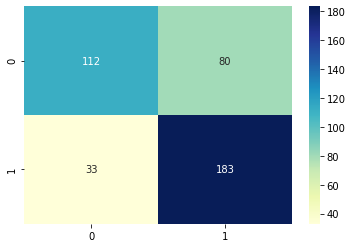

In [11]:
import seaborn as sn
import pandas as pd
conf_mat_DF=pd.DataFrame(conf_matrix, range(2), range(2))
sn.heatmap(conf_mat_DF, annot=True, fmt="d", cmap="YlGnBu")